In [1]:
import os, json, sys
sys.path.append('../..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

from density_lime.explanations.linear import ExplainLinear
from density_lime.explanations.visualization import plot_importance
from density_lime.densities.density_vae import DensityVAE
from density_lime.densities.density_kde import DensityKDE
from density_lime.densities.density_kde_pca import DensityKDEKPCA, DensityKDEPCA

# Loadind data and Model

In [3]:
import torch
import torch.utils.data
from torchvision import datasets, transforms

from playground.models import nmist_CNN

In [4]:
epochs = 10
cuda = torch.cuda.is_available()
batch_size = 128
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
device = torch.device("cuda" if cuda else "cpu")
device_cpu = torch.device("cpu")

# train_loader = torch.utils.data.DataLoader(
#     datasets.MNIST('../data', train=True, download=True,
#                    transform=transforms.ToTensor()),
#     batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

In [5]:
path='mode_nmist_cnn.pth'
model = nmist_CNN.model_load(device, path=path)
def model_predict(x_):
    if isinstance(x_, torch.Tensor):
        x_tf = x_
    else:
        x_tf = torch.from_numpy(x_)
    with torch.no_grad():
        x_tf = x_tf.reshape(-1, 1, 28, 28)
        y = model(x_tf.to(device=device))
        y = y.data.exp().to(device_cpu).numpy()
        return y

In [6]:
examples = enumerate(test_loader)

In [7]:

batch_idx, (example_data, example_targets) = next(examples)

In [8]:
x_examples = example_data #.to(density.model.device_cpu).numpy()
x_examples.shape

torch.Size([128, 1, 28, 28])

In [9]:
def plot_instances(ax, x_, y_=None):
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.set_title(y_)
    return ax.imshow(x_, interpolation = 'none')

In [10]:
# fig, axis = plt.subplots(5,5, figsize=(15, 5))
# axis = axis.reshape(-1)
# for ax in axis:
#     index = np.random.choice(range(125))
#     x_explain = x_examples[index][0]
#     with torch.no_grad():
#         y = model_predict(x_explain.view(-1, 1, 28, 28))
#         y = 'index: {:} - prediction: {:}'.format(index, np.argmax(y))
#     cp = plot_instances(ax, x_explain, y)

In [11]:
# fig, axis = plt.subplots(25,5, figsize=(15, 40))
# axis = axis.reshape(-1)
# for ax, index in zip(axis, range(125)):
#     x_explain = x_examples[index][0]
#     with torch.no_grad():
#         y = model_predict(x_explain.view(-1, 1, 28, 28))
#         y = 'index: {:} - prediction: {:}'.format(index, np.argmax(y))
#     cp = plot_instances(ax, x_explain, y)

### Explain a instance

predicted: 3


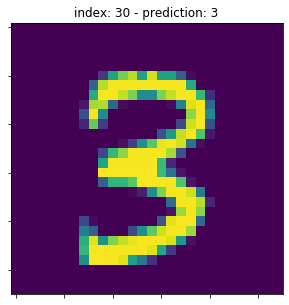

In [12]:
index = 30
# x_explain = x_examples[index][0].to(device_cpu).numpy()
# np.savetxt('three_explain.np', x_explain)
x_explain = np.loadtxt('three_explain.np').astype(np.float32)
y_explain = model_predict(x_explain)
y_explain_index = np.argmax(y_explain)
print('predicted:', y_explain_index)
fig, axis = plt.subplots(1, figsize=(15, 5))
y = 'index: {:} - prediction: {:}'.format(index, np.argmax(y_explain))
cp = plot_instances(axis, x_explain, y)


## DensityVAE

In [13]:
density = DensityVAE(input_dim=784)

In [14]:
# density.fit(train_loader, epochs=20)

In [15]:
# density.save_manifold('./mode_vae_manifold.pth')

In [16]:
density = density.load_manifold('./mode_vae_manifold.pth')

In [17]:
if False:
    x_sample = density.sample_radius(x_exp=x_explain.reshape(-1, 784), r=1.5, n_samples=15000, random_state=None)
    fig, axis = plt.subplots(5, 10, figsize=(15, 5))
    axis= axis.reshape(-1)
    for ax, img_i in zip(axis, x_sample[:50]):
        x_ = img_i.reshape(28, 28)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.imshow(x_, interpolation = 'none')
    plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99, wspace=0.01, hspace=0.001)
    plt.show()

In [18]:
50%50

0

0.06468559630793327


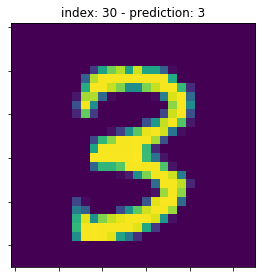

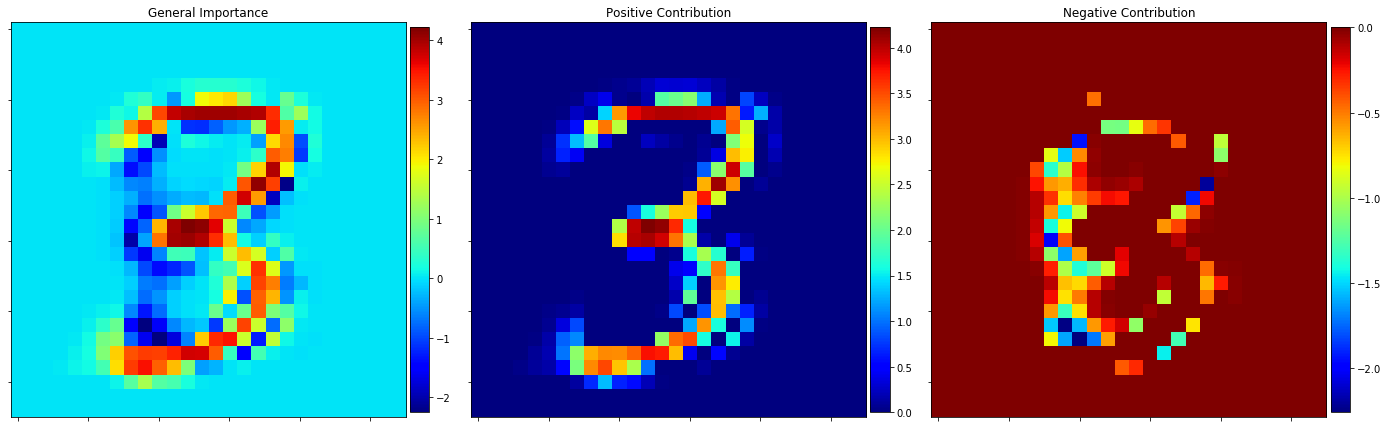

In [33]:
try:
    del explain_linear
except:
    pass
torch.cuda.empty_cache()
explain_linear = ExplainLinear(model_predict=model_predict, density=density, linear_model='SGD', verbose=True)
result1 = explain_linear.explain_instance(x_explain=x_explain, r=0.1, class_index=3, n_samples=1000, epochs=10)
# pprint(result['stats'])
y = 'index: {:} - prediction: {:}'.format(index, np.argmax(y_explain))
fig, axis = plt.subplots(1, figsize=(4.5, 4.5))
ax = plot_instances(axis, x_explain, y)
a = plot_importance(result['importance'], standardization=True)

0.15907337009031203
0.08297731358580152
0.06212454745157285
0.06883094851627973
0.045623822640940614
0.044224497648279806
0.042807346743730455
0.037344381510188734
0.0495898796372221
0.035613356135592356
0.028859146495318302
0.03176508802596145
0.02418656086537775
0.045766262071510785
0.034125118499691756
0.019565126793614093
0.026769940411978686
0.028319914792405032
0.030049804849377807
0.024484238944500053
0.047592265433534856
0.04089376088247902
0.031136074379072065
0.029382977265788007
0.019740005067166538
0.025801716492197074
0.024675884177571286
0.012428006633182309
0.027698112907401838
0.018597526895948582
0.02438727132214051
0.014154691965181293
0.024598317533487075
0.014388877603022732
0.008313795836133578
0.017402858788540126
0.020994540409013336
0.00871071118427749
0.013238383458674433
0.02738411533006803
0.022337155836167192
0.026090611097088205
0.01858568670801103
0.01864062340525236
0.017245630632823403
0.020989206371598755
0.021693321387948047
0.010813785612875928
0.0101

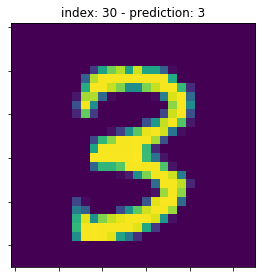

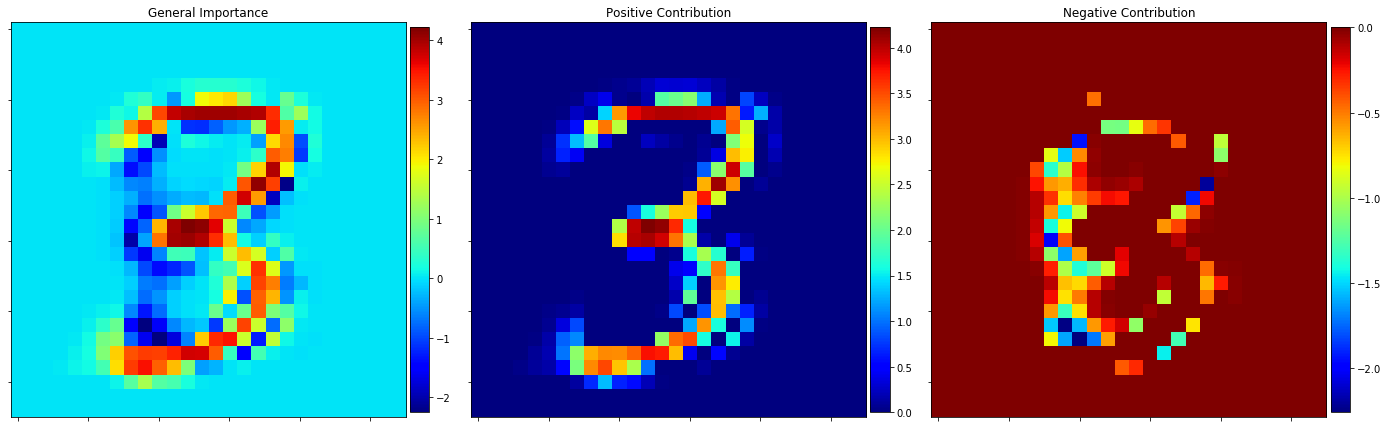

In [27]:
try:
    del explain_linear
except:
    pass
torch.cuda.empty_cache()
explain_linear = ExplainLinear(model_predict=model_predict, density=density, linear_model='SGD', verbose=True)
result = explain_linear.explain_instance(x_explain=x_explain, r=0.1, class_index=3, n_samples=10000, epochs=1000)
# pprint(result['stats'])
y = 'index: {:} - prediction: {:}'.format(index, np.argmax(y_explain))
fig, axis = plt.subplots(1, figsize=(4.5, 4.5))
ax = plot_instances(axis, x_explain, y)
a = plot_importance(result['importance'], standardization=True)

0.24970155008170247
0.0196923468517038


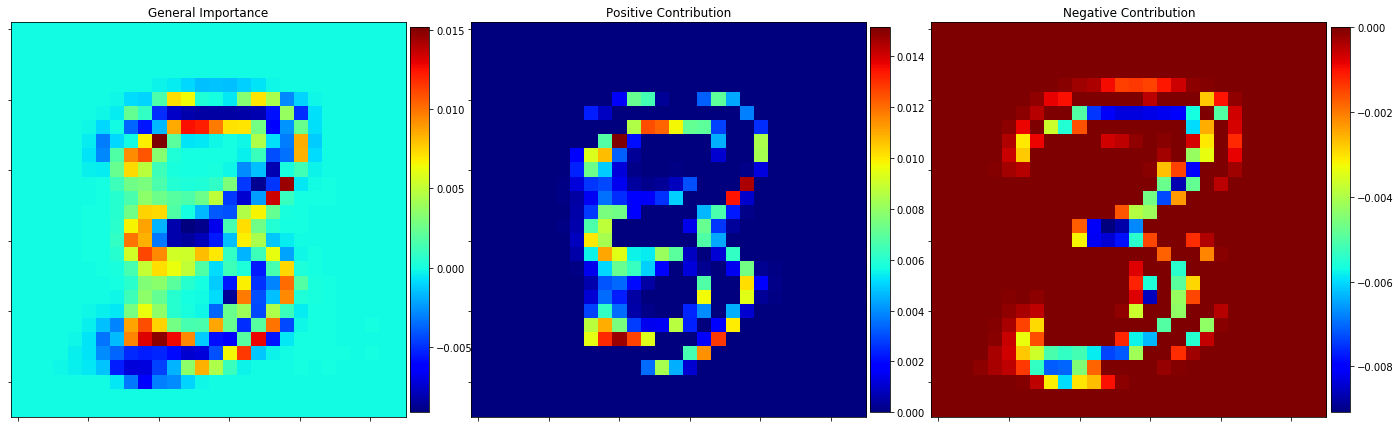

In [34]:
diffa = result1['importance'] - result['importance']
print(np.sum(diffa))
print(np.max(result['importance']))
a = plot_importance(diffa)


In [22]:
 
# print(np.sum(diffa))
# a = plot_importance(diffa)